#4.3

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
Tempature = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])
x = np.array(range(1,25))
n = 24
M = 10
phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A
    

In [4]:
phi.shape

(24, 10)

0.17681271199864057
0.19847798998272592
0.1843021063799689
0.19847223523112945


/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+03, tolerance: 5.602e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.704e+03, tolerance: 5.602e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

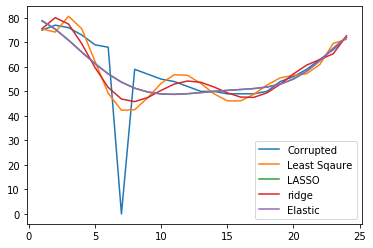

In [9]:
f = np.copy(Tempature)
f[np.random.choice(range(24),1)] = 0 ## Add outlier
plt.plot(x,f,label='Corrupted')

a1 = np.linalg.lstsq(phi,f,rcond=None)[0]
f1 = phi @ a1
print(np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2))
plt.plot(x,f1,label='Least Sqaure')

regr2 = linear_model.Lasso(alpha=.8,max_iter=10**5,)
regr2.fit(phi, f)  
a2 = regr2.coef_
f2 = regr2.predict(phi)
print(np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2))
plt.plot(x,f2,label='LASSO')

ridge = linear_model.Ridge(alpha=0.8,max_iter=10**5).fit(phi,f)
a3 = ridge.coef_
f3 = ridge.predict(phi)
print(np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2))
plt.plot(x,f3,label='ridge')

regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=0.2, max_iter=10**5,random_state=0)
regr4.fit(phi, f)  
a4 = regr4.coef_
f4 = regr4.predict(phi)
print(np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2))
plt.plot(x,f4,label='Elastic')
plt.legend()

In [10]:
## Different regressions
lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))


for jj in range(100):
# for jj in range(10):
    f = np.copy(Tempature)
    corrupt = np.random.choice(range(1,3),1)
    f[np.random.choice(range(24),corrupt)] = 0 ## Add outlier
    
    a1 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f1 = phi @ a1
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    
    regr2 = linear_model.Lasso(alpha=.8,max_iter=10**5,)
    regr2.fit(phi, f)  
    a2 = regr2.coef_
    f2 = regr2.predict(phi)
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    
    ridge = linear_model.Ridge(alpha=0.8,max_iter=10**5).fit(phi,f)
    a3 = ridge.coef_
    f3 = ridge.predict(phi)
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = regr4.predict(phi)
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4

    
Err2 = np.column_stack((E1,E2,E3,E4))

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+03, tolerance: 8.785e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.915e+03, tolerance: 8.785e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.983e+02, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.958e+02, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+03, tolerance: 5.548e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+03, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.985e+03, tolerance: 8.728e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.975e+03, tolerance: 8.728e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+03, tolerance: 8.362e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.224e+03, tolerance: 8.362e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e+03, tolerance: 5.390e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+03, tolerance: 5.323e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+03, tolerance: 5.602e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+03, tolerance: 5.626e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.527e+03, tolerance: 8.325e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.943e+02, tolerance: 5.548e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+03, tolerance: 5.614e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+03, tolerance: 5.614e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+03, tolerance: 8.379e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+03, tolerance: 8.379e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.554e+03, tolerance: 8.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+03, tolerance: 8.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 5.594e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.47958e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 5.594e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc1be2e1e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc1be2e8910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc1be2e11d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc1be2e1ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1be2ef890>,
 'means': []}

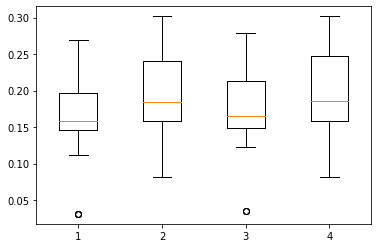

In [11]:
plt.boxplot(Err2)

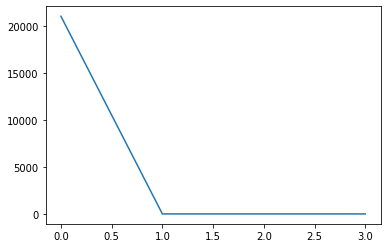

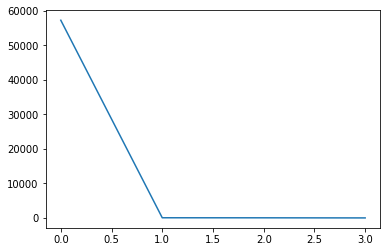

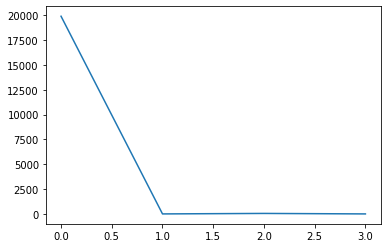

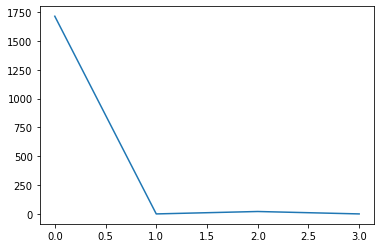

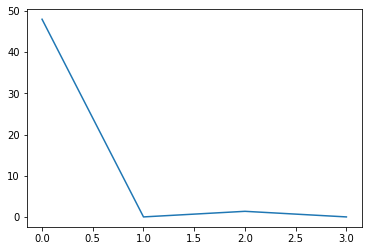

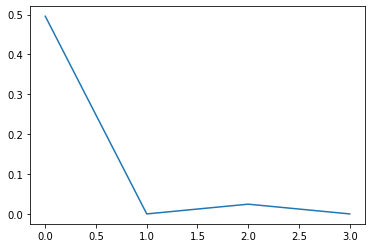

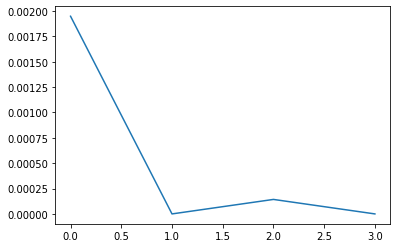

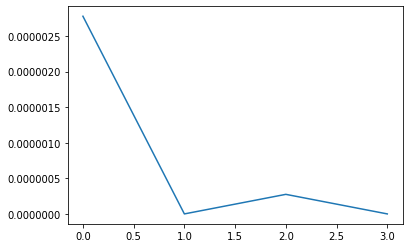

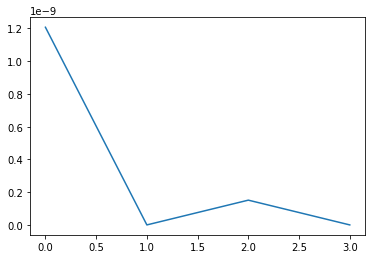

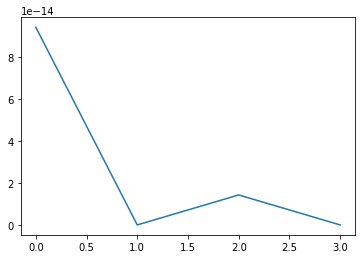

In [12]:
for i in range(10):
    plt.figure()
    plt.plot([np.var(A1,1)[i],np.var(A2,1)[i],np.var(A3,1)[i],np.var(A4,1)[i]])


4.4

In [162]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [137]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [138]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [139]:
A = train_X.reshape(-1,28*28)

In [141]:
B = train_y

In [168]:
trail = 1
M = 784

A1 = np.zeros((M,trail))
E1 = np.zeros(trail)

for jj in range(trail):
    X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2)
    A = X_train.reshape(-1,28*28)
    B = y_train
    
    regr = linear_model.LogisticRegression(penalty='l1', C=0.1,solver = 'saga', multi_class = 'multinomial')
    regr.fit(A, B)  
    a = regr.coef_
    X_valid = X_valid.reshape(-1,28*28)
    f = regr.predict(X_valid)
    E1[jj] = np.sum(f==y_valid)/len(y_valid)


/Users/senlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


ValueError: could not broadcast input array from shape (10,784) into shape (784,)

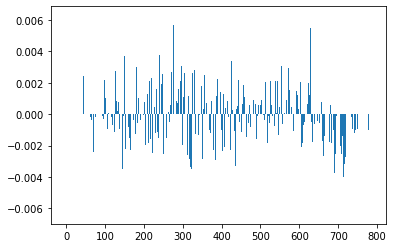

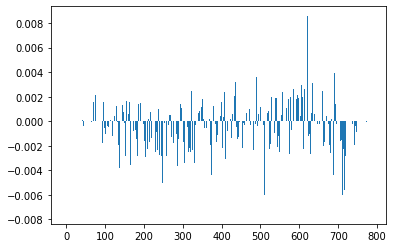

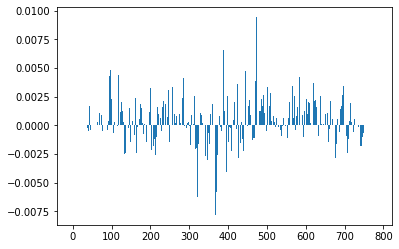

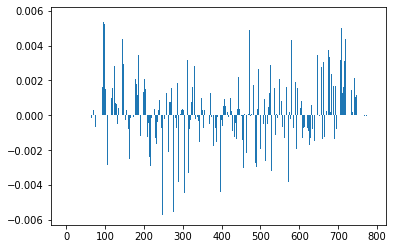

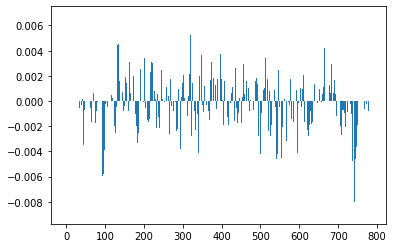

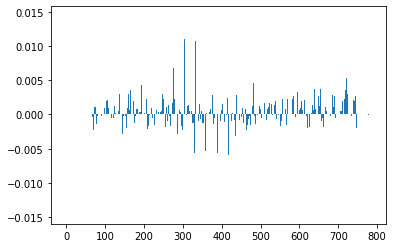

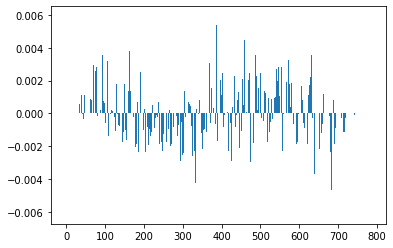

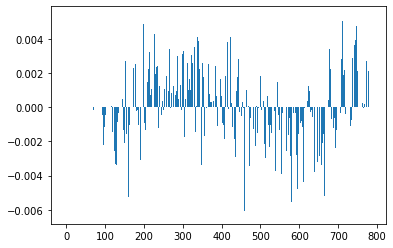

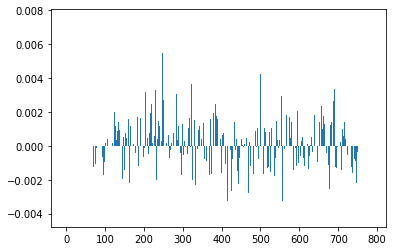

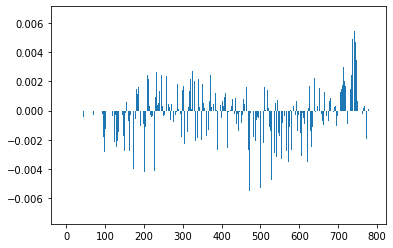

In [180]:
for i in range(10):
    plt.figure()
    plt.bar(range(784),a[i,])

In [186]:
f = regr.predict(test_X.reshape(-1,28*28))
acc = np.sum(f==test_y)/len(test_y)
acc

0.9235